# Data Source Information

My data source is from the Kaggle website. It is called "Time Wasters on Social Media" and can be found at this URL: https://www.kaggle.com/datasets/muhammadroshaanriaz/time-wasters-on-social-media


# Introduction

The dataset contains information about social media usage, time-wasting activities and addiction. I will aim to answer the following questions in this data analysis:

1. Which social media platform has the highest average time spent by users?
2. What is the distribution of time spent on social media across different age groups?
3. What are the most common activities users engage in on social media?
4. How does social media usage vary by geographic region?
5. Are certain age groups more likely to spend excessive time on social media?
6. Is there a correlation between the amount of time spent on social media and user satisfaction or well-being?

These questions can provide insights into the behavioral patterns and characteristics which can be explored using data analysis and visualization techniques.

# Reading Data in Dataframe

In [205]:
import pandas as pd
path = 'Time-Wasters on Social Media.csv'
df = pd.read_csv(url)

# Exploratory Data Analysis

## Displayed the first 10 rows of the DataFrame

In [174]:
df.head(10)

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
5,6,38,Male,Vietnam,45279,False,False,driver,Urban,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi
6,7,56,Male,India,46201,False,False,Students,Rural,TikTok,...,8,2,Habit,Smartphone,Android,8:00 AM,10,0,At school,Wi-Fi
7,8,36,Male,Barzil,39715,False,False,Engineer,Rural,Instagram,...,3,7,Entertainment,Tablet,Android,9:00 PM,5,5,At home,Mobile Data
8,9,40,Male,United States,49309,False,False,Waiting staff,Rural,Instagram,...,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Mobile Data
9,10,28,Other,United States,35078,False,False,Students,Rural,YouTube,...,6,4,Boredom,Smartphone,iOS,2:00 PM,8,2,At home,Mobile Data


## Check for null values and datatypes

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

## Check for missing values

In [176]:
missing_values = df.isnull().sum()
display("Missing Values:")
display(missing_values)

'Missing Values:'

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

## Check for duplicate entries

In [177]:
duplicate_entries = df.duplicated().sum()
display("Number of Duplicate Entries:", duplicate_entries)

'Number of Duplicate Entries:'

0

## Summary Statistics.

### Selecting numerical columns

In [178]:
numerical_columns = ['Age', 'Income', 'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level']

### Add 'Watch Time' to numerical columns

In [179]:
numerical_columns.append('Watch Time')

### Calculate basic summary statistics for numerical columns

In [180]:
numerical_columns_summary = df[numerical_columns].describe()

### Calculate range for each numerical column as the difference between max and min

In [181]:
numerical_columns_range = df[numerical_columns].max()

In [182]:
numerical_columns_range = df[numerical_columns].min()

### Display the summary statistics

In [183]:
print(numerical_columns_summary)

               Age        Income  ProductivityLoss  Satisfaction  \
count  1000.000000   1000.000000       1000.000000   1000.000000   
mean     40.986000  59524.213000          5.136000      4.864000   
std      13.497852  23736.212925          2.122265      2.122265   
min      18.000000  20138.000000          1.000000      1.000000   
25%      29.000000  38675.250000          3.000000      4.000000   
50%      42.000000  58805.000000          5.000000      5.000000   
75%      52.000000  79792.250000          6.000000      7.000000   
max      64.000000  99676.000000          9.000000      9.000000   

       Self Control  Addiction Level  
count   1000.000000      1000.000000  
mean       7.094000         2.906000  
std        2.058495         2.058495  
min        3.000000         0.000000  
25%        5.000000         2.000000  
50%        7.000000         3.000000  
75%        8.000000         5.000000  
max       10.000000         7.000000  


# Data Visualisation

## Visualization 1: Q1. Which social media platform has the highest average time spent by users?

In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

In [185]:
file_path = '/mnt/data/Time-Wasters on Social Media.csv'
df = pd.read_csv('Time-Wasters on Social Media.csv')

### Convert 'Watch Time' to numeric hours (assuming format 'HH:MM AM/PM')

In [186]:
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.hour + pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.minute / 60

### Plot average watch time by social media platform

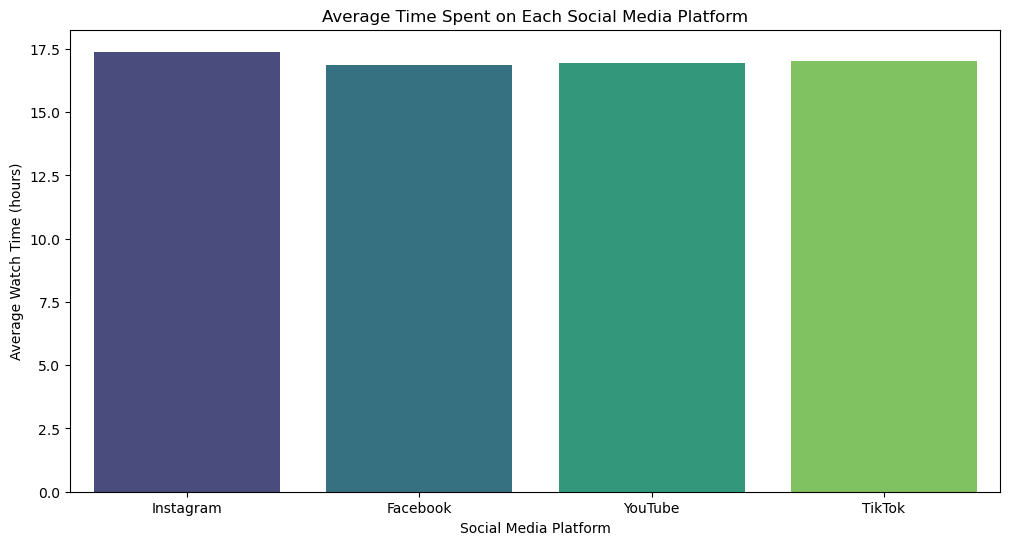

In [187]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Platform', y='Watch Time', estimator='mean', errorbar=None, palette='viridis')
plt.title('Average Time Spent on Each Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Average Watch Time (hours)')
plt.show()

The bar plot illustrates the average watch time in hours on various social media platforms. Instagram, Facebook, YouTube, and TikTok are all shown to have similar high average watch times, indicating that users spend a significant amount of time on these platforms

## Visualization 2: Q2. Which social media platform has the highest average time spent by users?

### Load the dataset

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/mnt/data/Time-Wasters on Social Media.csv'
df = pd.read_csv('Time-Wasters on Social Media.csv')

### Convert 'Watch Time' to numeric hours 

In [189]:
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.hour + pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.minute / 60

### Replace infinite values with NaN

In [190]:
df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

### Plot distribution of watch time across different age groups

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


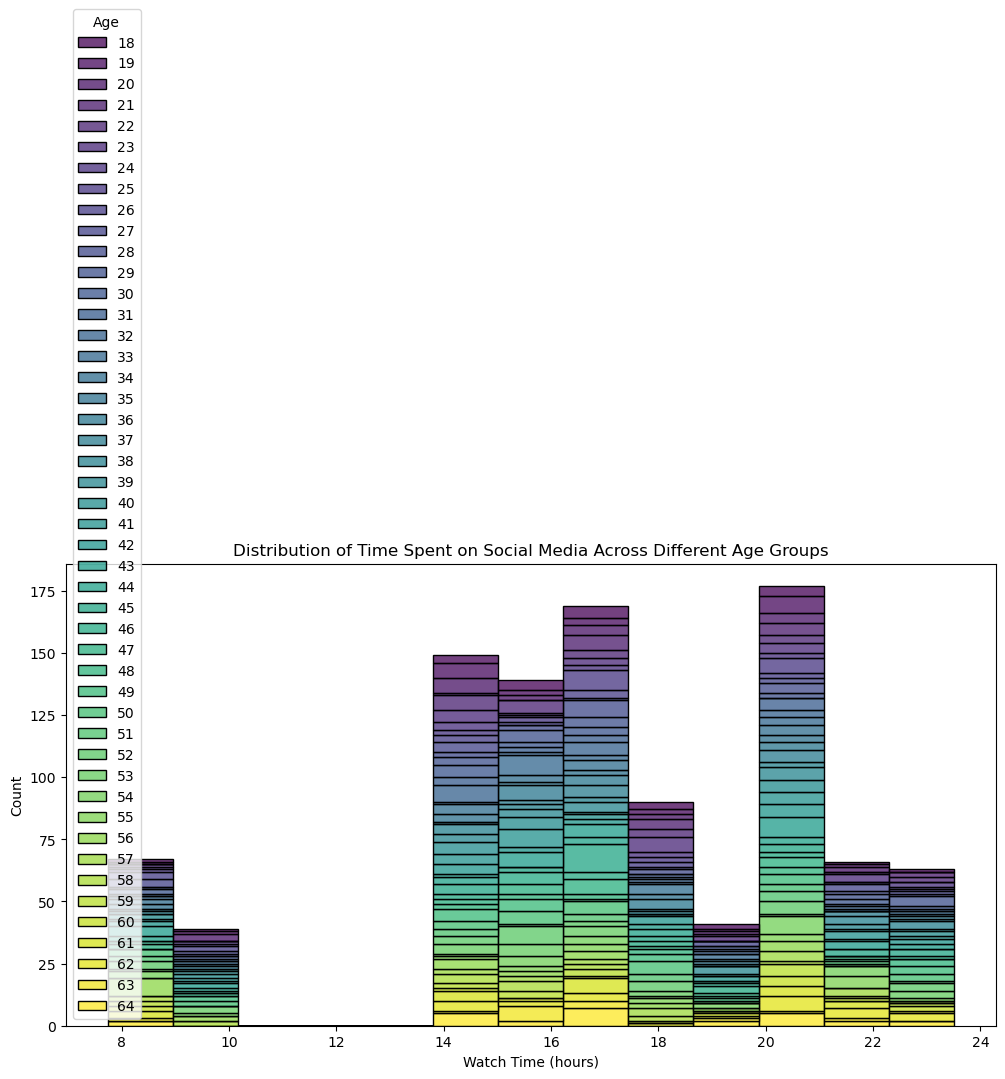

In [191]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Watch Time', hue='Age', multiple='stack', palette='viridis')
plt.title('Distribution of Time Spent on Social Media Across Different Age Groups')
plt.xlabel('Watch Time (hours)')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of time spent on social media across different age groups. Each bar represents the count of users within a specific watch time range, and the colors indicate different age groups. The plot reveals patterns of social media usage, with notable peaks at certain watch time intervals, highlighting variations in engagement among different age demographics.

## Visualization 3: Q3. What are the most common activities users engage in on social media?

### Calculate the percentage of each activity

In [192]:
activity_counts = df['CurrentActivity'].value_counts()
activity_percentages = 100 * activity_counts / activity_counts.sum()

### Plot the pie chart for activities

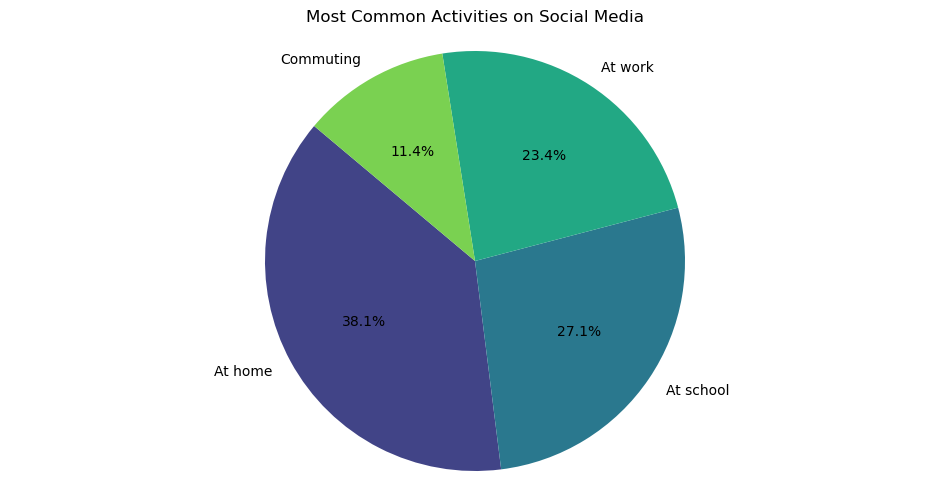

In [193]:
plt.figure(figsize=(12, 6))
plt.pie(activity_percentages, labels=activity_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(activity_percentages)))
plt.title('Most Common Activities while on Social Media')
plt.axis('equal')
plt.show()

The pie chart shows that the most common activities on social media are spending time at home (38.1%), followed by at school (27.1%), at work (23.4%), and commuting (11.4%).

## Visualization 4: Q4. How does social media usage vary by geographic region?

### Load the dataset

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Time-Wasters on Social Media.csv'
df = pd.read_csv('Time-Wasters on Social Media.csv')

### Replace 'Barzil' with 'Brazil'

In [195]:
df['Location'] = df['Location'].replace('Barzil', 'Brazil')

### Count the number of time wasters by country

In [196]:
country_counts = df['Location'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

### Plot the bar plot for the number of time wasters by country

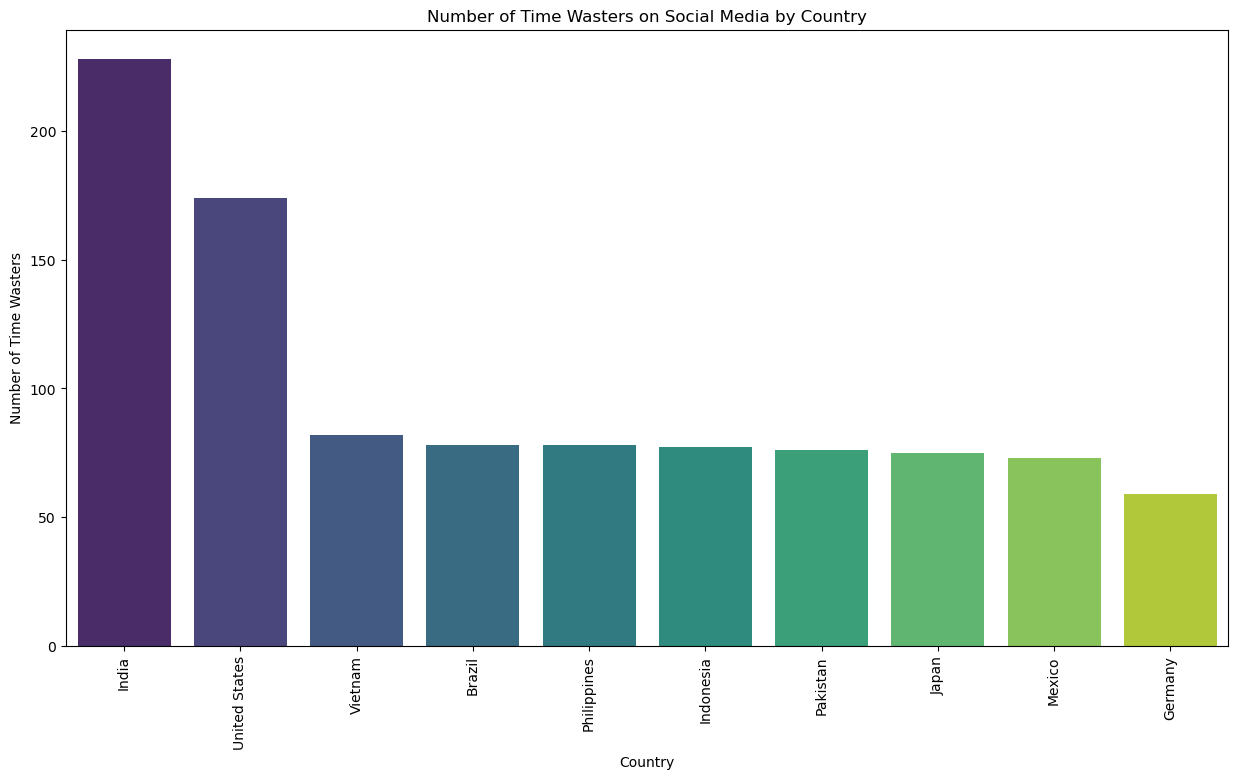

In [197]:
plt.figure(figsize=(15, 8))
sns.barplot(data=country_counts, x='Country', y='Count', palette='viridis')
plt.xticks(rotation=90)
plt.title('Number of Time Wasters on Social Media by Country')
plt.xlabel('Country')
plt.ylabel('Number of Time Wasters')
plt.show()

The bar plot shows that India and the United States have the highest number of time wasters on social media, followed by Vietnam, Brazil, the Philippines, Indonesia, Pakistan, Japan, Mexico, and Germany.

## Visualization 5: Q5. Are certain age groups more likely to spend excessive time on social media?

### Convert 'Watch Time' to numeric hours (assuming format 'HH:MM AM/PM')

In [198]:
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.hour + pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.minute / 60

### Define excessive time as more than 5 hours

In [199]:
df['Excessive Time'] = df['Watch Time'] > 5

### Plot the likelihood of excessive time spent on social media by age group

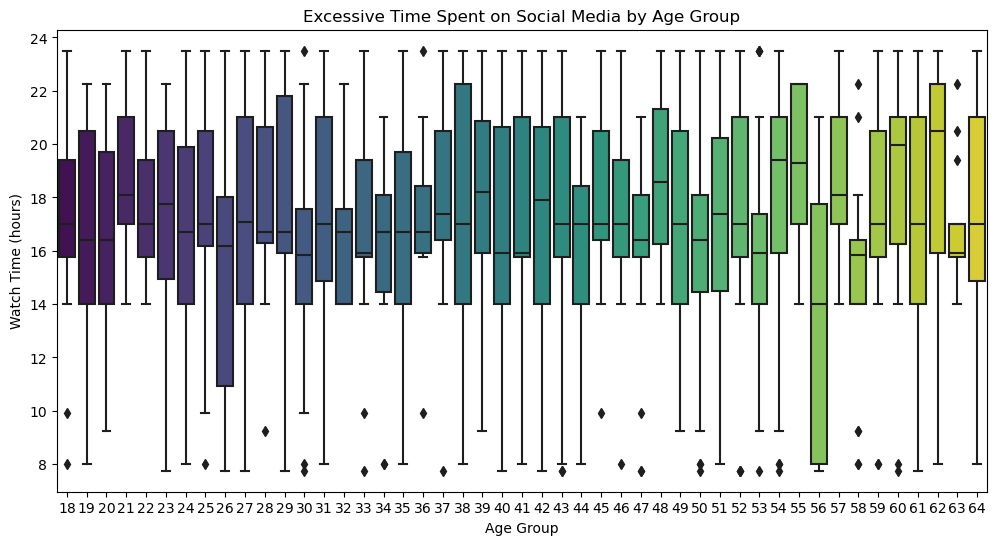

In [200]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='Watch Time', palette='viridis')
plt.title('Excessive Time Spent on Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Watch Time (hours)')
plt.show()

The box plot shows that excessive time spent on social media is more common among younger age groups, with higher median watch times. Notably, the age group 56 has the lowest median watch time. This could be due to various factors such as reduced interest in social media, greater responsibilities, or a preference for other activities among this age group.

## Visualization 6: Q6. Is there a correlation between the amount of time spent on social media and user satisfaction or well-being?

In [201]:
file_path = 'Time-Wasters on Social Media.csv'
df = pd.read_csv('Time-Wasters on Social Media.csv')

### Convert 'Watch Time' to numeric hours (assuming format 'HH:MM AM/PM')

In [202]:
df['Watch Time'] = pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.hour + pd.to_datetime(df['Watch Time'], format='%I:%M %p').dt.minute / 60

### Plot correlation between watch time and satisfaction

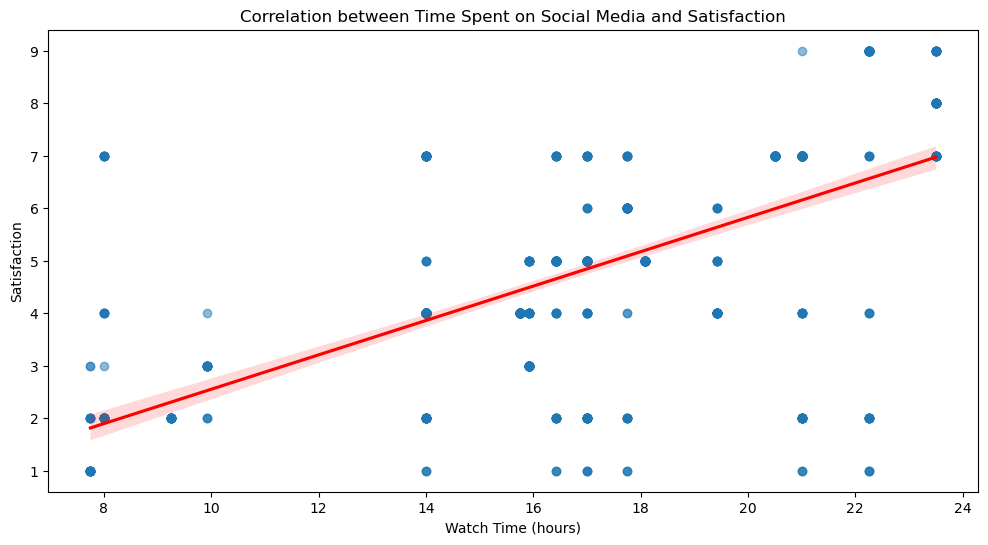

In [203]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='Watch Time', y='Satisfaction', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between Time Spent on Social Media and Satisfaction')
plt.xlabel('Watch Time (hours)')
plt.ylabel('Satisfaction')
plt.show()

The scatter plot shows a positive correlation between time spent on social media (watch time in hours) and satisfaction levels, with a red trend line indicating this relationship.



# Conclusion

Looking at the visualizations it is clear that social media has the highest average user time with younger age groups, especially teens and young adults, spending the most time on social media. 
The main activities are at home followed by school and work place. Usage varies regionally, with India and USA leading. Younger users are prone to spending excessive time online, and there is a positive correlation between time spent and user satisfaction, indicating that more usage is linked to higher satisfaction levels.